# Table of Contents
 <p><div class="lev1"><a href="#Changes"><span class="toc-item-num">1 - </span>Changes</a></div><div class="lev1"><a href="#Snake-Plissken"><span class="toc-item-num">2 - </span>Snake Plissken</a></div><div class="lev1"><a href="#Init"><span class="toc-item-num">3 - </span>Init</a></div><div class="lev1"><a href="#Formulas"><span class="toc-item-num">4 - </span>Formulas</a></div>

# Changes


|Date     |Issue                                 |
|---------|--------------------------------------|
|8.3.2016 |Changed Z Matrix for being symmetrical|
</left>

# Snake Plissken

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('M--bD_xmVb0')

# Init

In [2]:
import numpy as np
from numpy import pi,sqrt,sin,cos,tan,arcsin,arccos,arctan,conj,exp
from numpy import real as re,imag as im

import sympy as sp
from sympy import limit, Symbol, oo

import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display,Math,HTML,Latex # Used to display widgets in the notebook
sp.init_printing(use_unicode=True,use_latex=True,euler=True)
import ipywidgets as widgets #If not install run <pip install ipywidgets> in DOS command prompt (Anaconda distribution)
import time
print('Init done:', time.ctime() )
%matplotlib inline 
#connect_info
#sympy.__version__


Init done: Tue Mar  8 10:11:48 2016


# Formulas

In [3]:
#Symbolic variablde definitions http://docs.sympy.org/dev/modules/core.html
VmSym,ImSym,I1sym,I2sym,I3sym,I4sym,I5sym =sp.symbols( r"V_m,I_m,I_1,I_2,I_3,I_4,I_5",positive=True)

ZAIsym,ZAIBIsym,ZAICIsym,ZAIAIIsym,ZAIBIIsym =sp.symbols(
    r"Z_{AI},Z_{AIBI},Z_{AICI},Z_{AIAII},Z_{AIBII}",positive=True)

ZBIsym,ZBICIsym,ZBIAIIsym,ZBIBIIsym =sp.symbols(
    r"Z_{BI},Z_{BICI},Z_{BIAII},Z_{BIBII}",positive=True)

ZCIsym,ZCIAIIsym,ZCIBIIsym  =sp.symbols(r"Z_{CI},Z_{CIAII},Z_{CIBII}",positive=True)
ZAIIsym,ZAIIBIIsym          =sp.symbols(r"Z_{AII},Z_{AIIBII}",positive=True)
ZBIIsym                    =sp.symbols(r"Z_{BII}",positive=True)




In [4]:
Zmat=sp.Matrix([
            [ZAIsym    ,ZAIBIsym  ,ZAICIsym  ,ZAIAIIsym  ,ZAIBIIsym],
            [ZAIBIsym  ,ZBIsym    ,ZBICIsym  ,ZBIAIIsym  ,ZBIBIIsym],
            [ZAICIsym  ,ZBICIsym  ,ZCIsym    ,ZCIAIIsym  ,ZCIBIIsym],
            [ZAIAIIsym ,ZBIAIIsym ,ZCIAIIsym ,ZAIIsym    ,ZAIIBIIsym],
            [ZAIBIIsym ,ZBIBIIsym ,ZCIBIIsym ,ZAIIBIIsym ,ZBIIsym]   
               ])

Vmat= sp.Matrix([VmSym,VmSym,VmSym,0,0])

Imat= sp.Matrix([ImSym-I2sym-I3sym,ImSym-I1sym-I3sym,ImSym-I1sym-I2sym,I4sym,I5sym])

Ich bräuchte folgendes Gleichungssystem gelöst: (Bitte mal checken ob die Z Matrix korrekt ist)

In [5]:
display(Math(r"{0:s}={1:s}\cdot {2:s} ".format(sp.latex(Vmat),sp.latex(Zmat),sp.latex(Imat))))

<IPython.core.display.Math object>


Zunächst soll nach $I_1$ bis $I_5$ aufgelöst werden:

In [6]:
Mmat=Zmat*Imat-Vmat
exp1= Mmat.row(0)[0]
exp2= Mmat.row(1)[0]
exp3= Mmat.row(2)[0]
exp4= Mmat.row(3)[0]
exp5= Mmat.row(4)[0]
display(Math(r"{0:s}=0  ".format(sp.latex(exp1))))
display(Math(r"{0:s}=0  ".format(sp.latex(exp2))))
display(Math(r"{0:s}=0  ".format(sp.latex(exp3))))
display(Math(r"{0:s}=0  ".format(sp.latex(exp4))))
display(Math(r"{0:s}=0  ".format(sp.latex(exp5))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Das sind die 5 Gleichungen die im nun nach ach $I_1$ bis $I_5$ aufgelöst werden können. Allerdings ist die Ausgangsmatrixgleichung nicht der Form Ax=B (mit A,B Matrizen und x als Vektor) wodurch die Lösung derbe kompliziert wird (meine Annahme). Unten die Lösung, ich habe erstmal nicht weiter gemacht.  

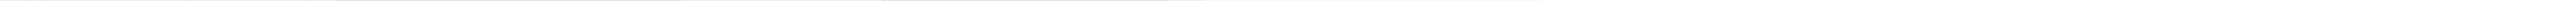

In [7]:
sp.solve([exp1,exp2,exp3,exp4,exp5], [I1sym,I2sym,I3sym,I4sym,I5sym])